In [1]:
import sys
print(sys.path)


['/home/lpazc/Documentos/Proyects/DroidMalDetect-Py/droidmaldetect_py/Dataset2017/notebook', '/usr/lib/python311.zip', '/usr/lib/python3.11', '/usr/lib/python3.11/lib-dynload', '', '/home/lpazc/Documentos/Proyects/DroidMalDetect-Py/.venv/lib/python3.11/site-packages']


In [2]:
import pandas as pd
import os
import dotenv
dotenv.load_dotenv()


False

In [3]:
# TODO: Columns that can be removed for column correlation analysis
# TODO: The initial version may change due to the relationship between the variables

datasets_malware = [
    {"path": ["dataset/2017_dataset/Adware"], "class":"Adware"},
    {"path": ["dataset/2017_dataset/Benign"], "class":"Benign"},
    {"path": ["dataset/2017_dataset/Ransomware"], "class":"Ransomware"},
    {"path": ["dataset/2017_dataset/Scareware"], "class":"Scareware"},
    {"path": ["dataset/2017_dataset/SMSmalware"], "class":"SMSmalware"},
]

In [4]:
abs_path_result = os.getenv('FOLDER_RESULT')

In [4]:
abs_path_result = "/home/lpazc/Documentos/Proyects/DroidMalDetect-Py/results"
categories =  ["".join([category['class'].upper(), '.csv']) for category in datasets_malware]
column_to_delete = ["Source IP", "Destination IP", "Timestamp", "Label"]

categories

['ADWARE.csv',
 'BENIGN.csv',
 'RANSOMWARE.csv',
 'SCAREWARE.csv',
 'SMSMALWARE.csv']

In [5]:
dataframe_general =  pd.DataFrame()
for category in categories:
    csv_path = os.path.join(abs_path_result, category)
    temp_dataframe: pd.DataFrame =  pd.read_csv(csv_path, index_col=False)
    print(category)
    dataframe_general =  pd.concat([dataframe_general, temp_dataframe], ignore_index=True)

ADWARE.csv
BENIGN.csv
RANSOMWARE.csv
SCAREWARE.csv
SMSMALWARE.csv


In [6]:
dataframe_general.dtypes

Source IP            object
Source Port         float64
Destination IP       object
Destination Port    float64
Protocol            float64
                     ...   
Idle Mean           float64
Idle Std            float64
Idle Max            float64
Idle Min            float64
Label                object
Length: 84, dtype: object

In [17]:
dataframe_general

,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,category
0,31.13.71.1,443.0,10.42.0.151,38833.0,6.0,14/06/2017 04:26:15,13.0,2.0,0.0,42.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ADWARE_SHUANET,0
1,10.42.0.151,38833.0,31.13.71.1,443.0,6.0,14/06/2017 04:26:15,24906.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ADWARE_SHUANET,0
2,10.42.0.151,38833.0,31.13.71.1,443.0,6.0,14/06/2017 04:26:15,163.0,2.0,0.0,42.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ADWARE_SHUANET,0
3,10.42.0.151,41420.0,172.217.6.237,443.0,6.0,14/06/2017 04:26:15,277972.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ADWARE_SHUANET,0
4,10.42.0.151,41420.0,172.217.6.237,443.0,6.0,14/06/2017 04:26:16,1123796.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ADWARE_SHUANET,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2613734,10.42.0.151,58368.0,192.229.163.180,443.0,6.0,30/06/2017 04:42:24,7583003.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,7583003.0,0.0,7583003.0,7583003.0,SMSMALWARE_BEANBOT,0
2613735,10.42.0.151,21164.0,10.42.0.1,53.0,17.0,30/06/2017 04:17:44,73511.0,1.0,1.0,34.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,SMSMALWARE_BEANBOT,0
2613736,54.239.17.112,443.0,10.42.0.151,43100.0,6.0,30/06/2017 04:34:17,67152.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,SMSMALWARE_BEANBOT,0
2613737,10.42.0.151,9986.0,10.42.0.1,53.0,17.0,30/06/2017 04:15:34,170111.0,1.0,1.0,34.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,SMSMALWARE_BEANBOT,0


In [7]:
dataframe_general['category'] = dataframe_general.Label.apply(lambda category:  1 if 'BENIGN' in category else 0)

<Axes: >

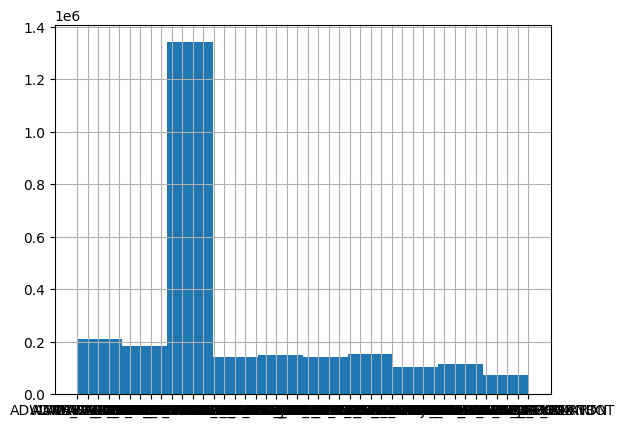

In [8]:
dataframe_general.Label.hist()

<Axes: >

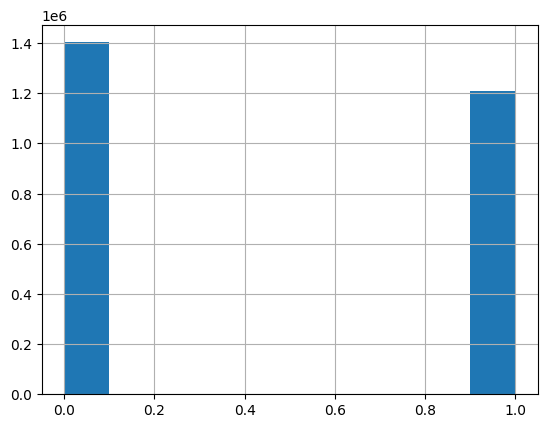

In [9]:
dataframe_general['category'].hist()

In [10]:
dataframe_general.size

222167815

In [11]:
dataframe_general.dtypes

Source IP            object
Source Port         float64
Destination IP       object
Destination Port    float64
Protocol            float64
                     ...   
Idle Std            float64
Idle Max            float64
Idle Min            float64
Label                object
category              int64
Length: 85, dtype: object

In [12]:
not_numeric_columns =  dataframe_general.select_dtypes(exclude=['int', 'float'])
dataframe_general.drop(not_numeric_columns.columns, inplace=True, axis=1)

In [13]:
dataframe_general.columns

Index(['Source Port', 'Destination Port', 'Protocol', 'Flow Duration',
       'Total Fwd Packets', 'Total Backward Packets',
       'Total Length of Fwd Packets', 'Total Length of Bwd Packets',
       'Fwd Packet Length Max', 'Fwd Packet Length Min',
       'Fwd Packet Length Mean', 'Fwd Packet Length Std',
       'Bwd Packet Length Max', 'Bwd Packet Length Min',
       'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s',
       'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max',
       'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std',
       'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean',
       'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags',
       'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Min Packet Length', 'Max Packet Length', 'Packet Length Mean',
       'Packet Length Std', 'Packet Length Variance', 'FIN Flag 

In [14]:
size_dataset_before_duplicates = dataframe_general.shape
dataframe_general_filter = dataframe_general.drop_duplicates(keep='first')
size_dataset_after_duplicates = dataframe_general_filter.shape

In [15]:
general_shape = pd.DataFrame([
    {'rows': size_dataset_before_duplicates[0], 'Columns': size_dataset_before_duplicates[1]},
    {'rows': size_dataset_after_duplicates[0], 'Columns': size_dataset_after_duplicates[1]}
])

In [16]:
import matplotlib.pyplot as plt

<Figure size 600x400 with 0 Axes>

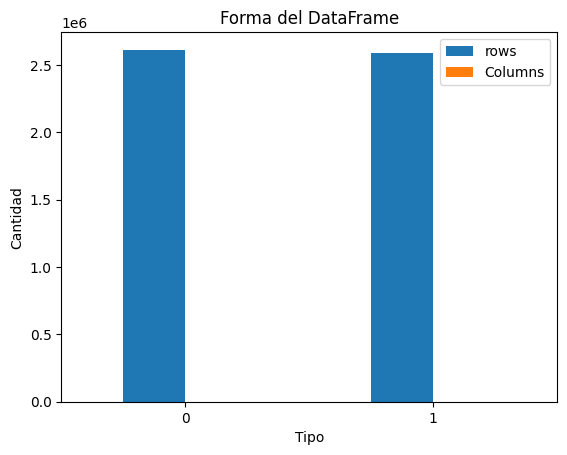

In [17]:
plt.figure(figsize=(6, 4))
general_shape.plot(kind='bar', rot=0)
plt.title('Forma del DataFrame')
plt.xlabel('Tipo')
plt.ylabel('Cantidad')
plt.show()

In [24]:
variance =  dataframe_general_filter.var()

In [29]:
variance.array

<NumpyExtensionArray>
[     337983530.1580065,      225161582.4450403,     20.660794738399762,
      483255928374284.6,       4896.59529825846,      46005.39499282215,
      740599435.3883982,      94924957432.62682,     165807.01744083056,
     3310.9342225882597,     16207.424538956098,      25331.98180961932,
      307469.3985994673,      4697.568550375883,     103985.86812786132,
      54513.36986644308,     1002095510830.7386,      1680062708.049722,
      64061904788436.76,     40426205399889.375,     339628572320927.94,
      54081891949895.33,     343805441641938.06,      71807498121211.31,
      38119386612044.75,     209409215484846.12,      59170528768971.38,
      331666589335132.3,      22627994512989.51,     28496246645319.355,
      236175862223681.9,     15178254671298.795,    0.06866875075573875,
                    0.0,                    0.0,                    0.0,
 2.9783175789253056e+16,  8.993381945258886e+16,     1325647886.9112585,
     125378032.14201142,     

In [22]:
for i in dataframe_general_filter.var():
    if i == 0:
     print(i)

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


In [19]:
dataframe_general_filter.to_csv(os.path.join(abs_path_result, 'general_malware.csv'), index=False)